In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import IPython, torch, warnings
import geomsolver as gs

In [3]:
warnings.simplefilter('ignore')

In [4]:
linkage = gs.Linkage()

<IPython.core.display.Javascript object>


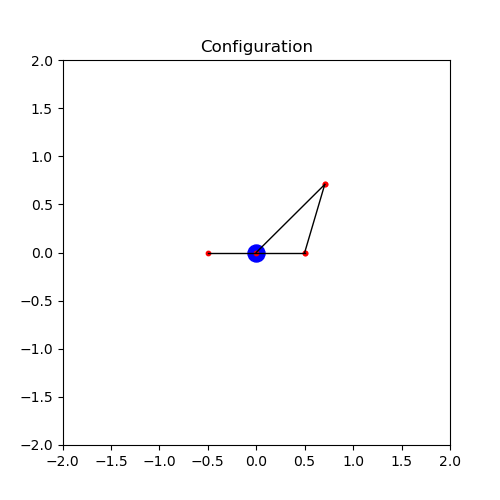

In [5]:
linkage.show_configuration(show_origin=False)

<IPython.core.display.Javascript object>


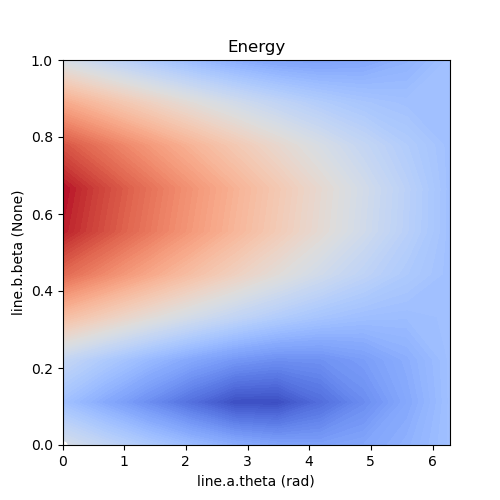

In [6]:
linkage.show_energy_plot()

In [7]:
A = linkage.add_anchorpoint(at=[0,0,0])

In [8]:
a = A.add_onpointline(L=1, theta=0, beta=0.5)

In [9]:
b = A.add_onpointline(L=1, theta=45, beta=0)

In [10]:
c = linkage.add_frompointsline(a.p2, b.p2)

In [11]:
c.constrain_length(0, solve=False)

In [12]:
linkage.energy()

tensor(0.7368, grad_fn=<AddBackward0>)

In [13]:
linkage._energy().shape

torch.Size([1, 1, 1, 1])

In [14]:
linkage.energy_plot.show_controller()

interactive(children=(Dropdown(description='x_name', options=('line.a.theta', 'line.a.beta', 'line.b.theta', '…

In [15]:
zz

NameError: name 'zz' is not defined

In [ ]:
'''
for param in linkage.get_param_dict().values():
    if param.full_name not in ['line.a.theta', 'line.b.beta']:
        param.reset_manual()
''';

In [ ]:
a = A.add_frompointline(L=1, theta=0)
a.lock()

In [ ]:
b = A.add_frompointline(L=1, theta=50)

In [ ]:
c = A.add_frompointline(L=1, theta=70)

In [ ]:
d = linkage.add_frompointsline(b.p2, c.p2)

In [ ]:
d.constrain_length(0.5, solve=False)

In [ ]:
c.set_parameter('theta', np.pi/2, solve=False)

In [ ]:
b.set_parameter('theta', np.linspace(0, 2*np.pi, 1000).tolist(), manual=True, solve=False)

In [ ]:
c.set_parameter('theta', np.linspace(0, 2*np.pi, 1000).tolist(), manual=True, solve=False)

In [ ]:
b._params.theta.tensor.shape

In [ ]:
c._params.theta.tensor.shape

In [ ]:
linkage.energy()

In [ ]:
linkage.energy(use_manual_params=True).shape

In [ ]:
linkage.energy_plot.show_controller()